# Importamos las librerías necesarias

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Lectura de dataset

El dataset se encuentra en la página de kaggle en el link: https://www.kaggle.com/datasets/maharshipandya/twitter-stocks-dataset

In [3]:
df = pd.read_csv('/content/twitter-stocks.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


# Limpieza de datos

Verificamos que el dataset no tenga valores nulos.

In [5]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

# Asignación de indice para fecha

In [6]:
df.set_index("Date",inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


# Graficación

Se asigna nueva columna al dataframe sobre la media de volumen en las acciones para observar la comparación con el volumen a lo largo del tiempo.

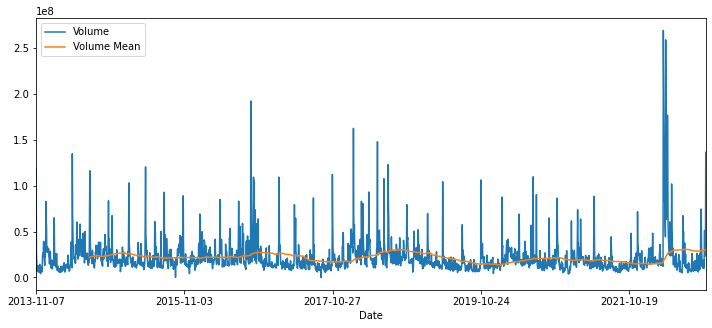

In [7]:
df['Volume Mean'] = df['Volume'].rolling(window=180).mean()
df[['Volume','Volume Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

Se observa que el año donde se obtuvieron mayores acciones es en el año 2022, esto debido a los rumores y reciente confirmación de la compra de Elon Musk a esta red social. Entonces tomaremos en cuenta el volumen como variable dependiente.

In [8]:
df['Volume'].nlargest(10)

Date
2022-04-04    269213085.0
2022-04-14    258868339.0
2022-04-05    217520098.0
2016-09-23    192269255.0
2022-04-25    176803635.0
2018-02-08    162434360.0
2022-04-06    159034747.0
2022-04-18    153119550.0
2018-06-06    147805710.0
2022-10-27    136345128.0
Name: Volume, dtype: float64

# Asignación de variables independientes y valor dependiente

Asignamos como variables independientes todos exceptuando la fecha porque es irrelevante en este caso y como variable dependiente el volumen ya que es el que se utilizará como target.

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Volume Mean
Date,,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,NaN
2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,NaN
2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,NaN
2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,NaN
2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,NaN


In [10]:
X = df.iloc[:,[0,1,2,3,4]] 
Y = df.iloc[:,5]

# Variables de prueba y entrenamiento

Generamos las variables de prueba y entrenamiento con un tamaño de prueba de 25% y random_state en 42 para no generar un conjunto de prueba distinto cada vez que se ejecute el código.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Generamos el modelo

Utilizaremos el algoritmo de arbol de decisión con el minimo de muestras para dividir en 3 en un nodo interno

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=3)

Obtenemos el puntaje

In [13]:
classifier.score(X_train, y_train)

0.9368358913813459

# Predicción

In [17]:
y_pred = classifier.predict(X_test)
y_pred

array([2.27704640e+07, 1.78249850e+07, 1.04207230e+07, 1.62434360e+08,
       1.19938580e+07, 3.76822450e+07, 9.77465800e+06, 1.90514760e+07,
       1.50766220e+07, 1.93035350e+07, 3.01127910e+07, 1.56705640e+07,
       1.48354420e+07, 8.41358700e+06, 9.22364200e+06, 1.55030600e+07,
       1.90501420e+07, 1.50599390e+07, 1.13861470e+07, 1.58222350e+07,
       3.70010230e+07, 1.06271091e+08, 5.23881050e+07, 1.41049960e+07,
       8.25166100e+06, 2.32982780e+07, 1.96830490e+07, 2.24805720e+07,
       2.46575900e+07, 3.09118920e+07, 3.51691700e+07, 1.57798600e+07,
       1.28192760e+07, 2.19204520e+07, 1.18834140e+07, 8.49437900e+06,
       1.42256190e+07, 1.12023720e+07, 2.24847990e+07, 1.76416700e+07,
       7.58216100e+06, 1.65244140e+07, 1.85448350e+07, 1.30526070e+07,
       2.68000350e+07, 2.23790050e+07, 1.84853090e+07, 2.70564960e+07,
       1.34709976e+08, 8.74476800e+06, 7.86127800e+06, 7.65044880e+07,
       1.31726140e+07, 1.42036260e+07, 1.26432130e+07, 1.44069490e+07,
      

Predicción con valores medios

In [14]:
print(classifier.predict([[45,45,45,45,45]]))

[7924144.]
